# Машинное обучение. Лабораторная работа №1.

Выполнил: Петрухин Дмитрий Олегович

Группа: М8О-301Б-18.

In [1]:
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import operator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_wine = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


C:\Users\dobb2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


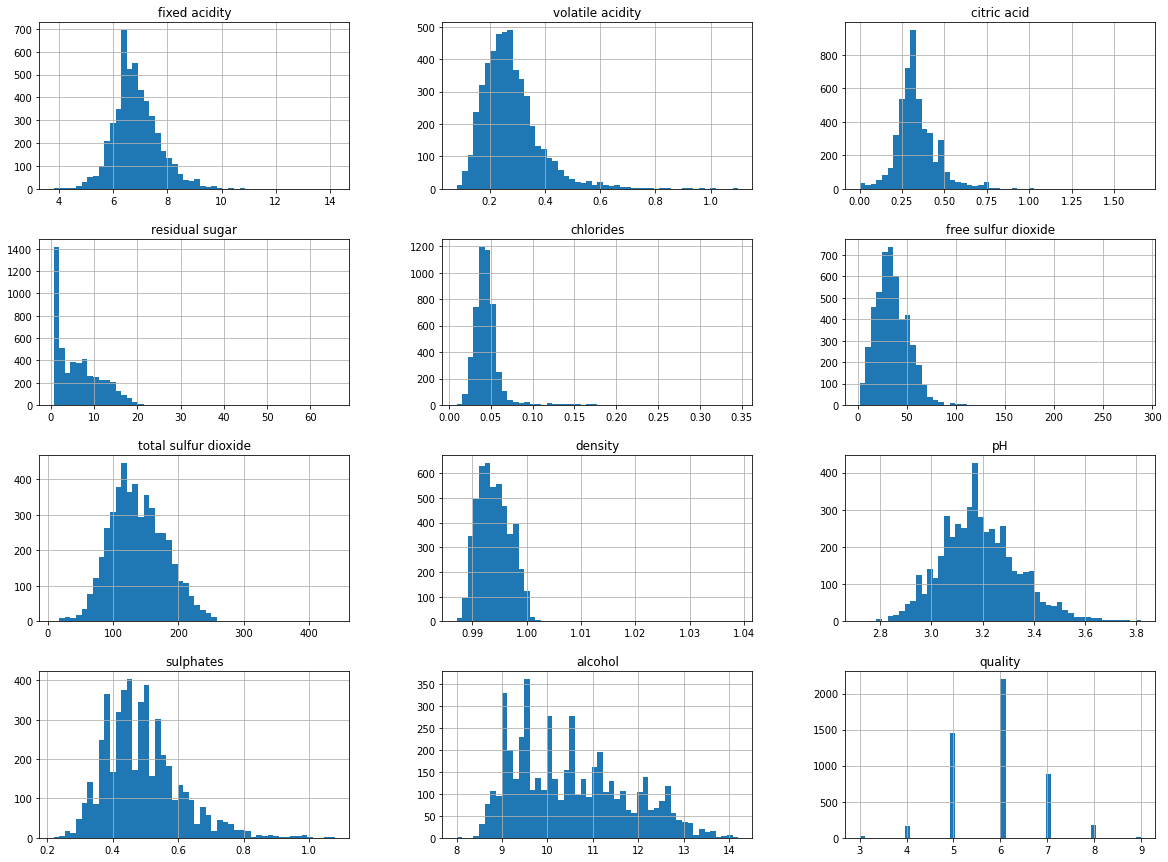

In [7]:
df_wine.hist(bins=50, figsize=(20,15))
plt.show()

Распределение значение параметров имеют нормальное распределение

Введем 2 категории вина вместо 7

In [8]:
df_wine.loc[df_wine['quality'] < 6, 'quality'] = 0
df_wine.loc[ ((df_wine['quality'] > 5)& (df_wine['quality'] < 10)), 'quality'] = 1

In [9]:
df_wine['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [10]:
numeric_data = df_wine.select_dtypes(include=[np.number])

In [11]:
numeric_attributes = numeric_data.columns

In [12]:
numeric_attributes

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
categorial_attributes=df_wine.select_dtypes(exclude=[np.number]).columns

In [14]:
categorial_attributes

Index([], dtype='object')

Пропуски

In [15]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df_wine.duplicated().sum()

937

Пропусков нет, но есть дубликаты. 

In [18]:
df_wine = df_wine.drop_duplicates().reset_index(drop = True)

In [19]:
df_wine['quality'].value_counts()

1    2613
0    1348
Name: quality, dtype: int64

(0.0, 15.0)

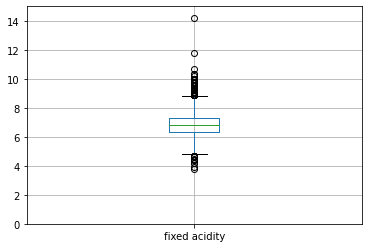

In [20]:
df_wine.boxplot(column=['fixed acidity'])
plt.ylim(0,15)

(0.0, 1.25)

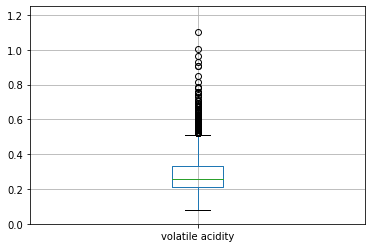

In [21]:
df_wine.boxplot(column=['volatile acidity'])
plt.ylim(0,1.25)

(0.0, 2.0)

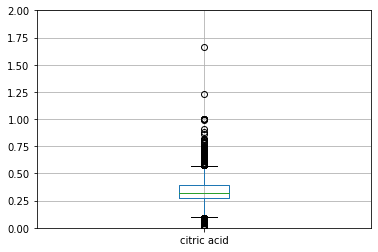

In [22]:
df_wine.boxplot(column=['citric acid'])
plt.ylim(0,2)

(0.0, 30.0)

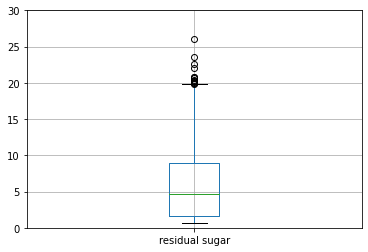

In [23]:
df_wine.boxplot(column=['residual sugar'])
plt.ylim(0,30)

(0.0, 0.4)

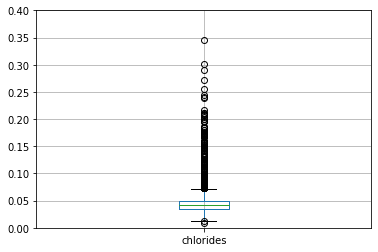

In [24]:
df_wine.boxplot(column=['chlorides'])
plt.ylim(0,0.4)

(0.0, 160.0)

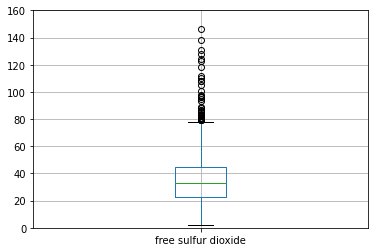

In [25]:
df_wine.boxplot(column=['free sulfur dioxide'])
plt.ylim(0,160)

(0.0, 500.0)

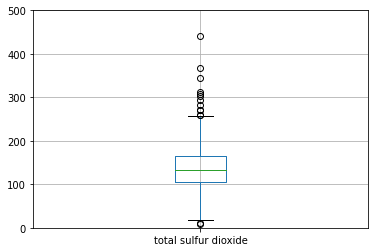

In [26]:
df_wine.boxplot(column=['total sulfur dioxide'])
plt.ylim(0,500)

(0.975, 1.05)

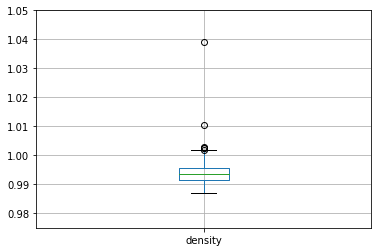

In [27]:
df_wine.boxplot(column=['density'])
plt.ylim(0.975,1.05)

(2.5, 4.0)

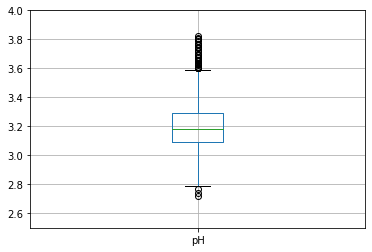

In [28]:
df_wine.boxplot(column=['pH'])
plt.ylim(2.5,4)

(0.2, 1.2)

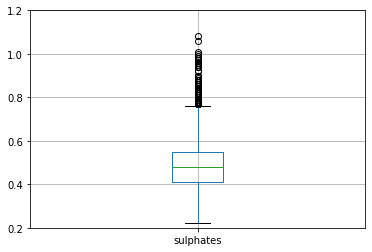

In [29]:
df_wine.boxplot(column=['sulphates'])
plt.ylim(0.2,1.2)

(7.5, 16.0)

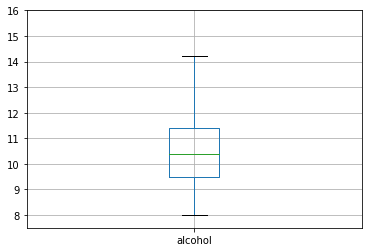

In [30]:
df_wine.boxplot(column=['alcohol'])
plt.ylim(7.5,16)

Так как в данных имеются аномалии, то нормировка будет следующей:



$$\widetilde{x_i} = \frac{x_i - \overline{x_i}}{\sigma_i}$$

Где 
$$ \overline{x_i} = \frac{1}{N} \sum_{k=1}^N X^k_I - среднее \ значение$$

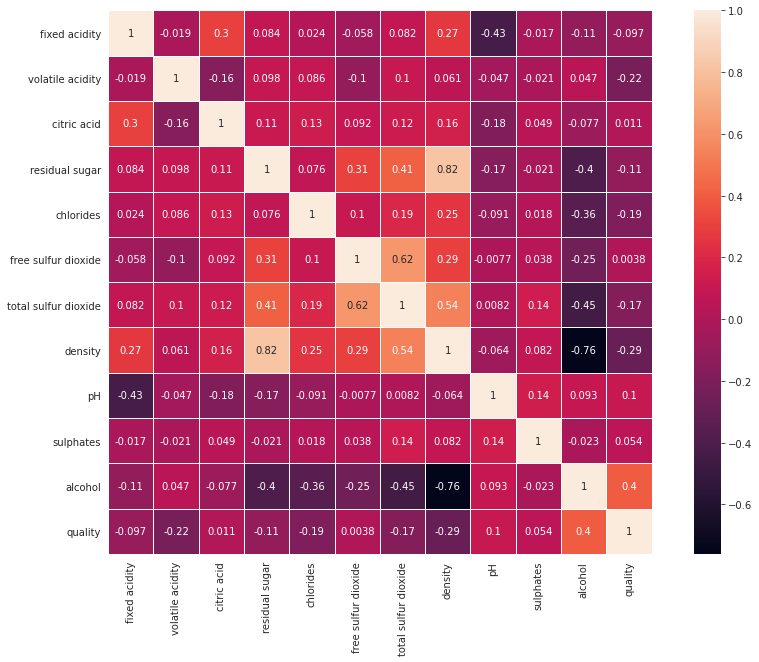

In [31]:
corr = df_wine.corr()
with sns.axes_style("white"):
    ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot = True, linewidths=.5)

# Нормировка данных

Так как границы значений у параметров различные, то необходимо привести их к одной границе(от 0 до 1).

In [32]:
parametr = df_wine.columns.tolist()
normalized_df_wine = pd.DataFrame()
for i in range(len(parametr)-1):
    normalized_df_wine[parametr[i]]=(df_wine[parametr[i]]-df_wine[parametr[i]].min())/(df_wine[parametr[i]].max()-df_wine[parametr[i]].min())
normalized_df_wine['quality'] = df_wine['quality']   

# Создаем тестовые и обучающие данные

In [33]:
features, target = normalized_df_wine.drop(columns=['quality']).to_numpy(), np.array(normalized_df_wine['quality'])

In [34]:
def split_train_test(X, y, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(X))
  test_set_size = int(len(X)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return X[train_indices], X[test_indices], y[train_indices], y[test_indices] # вернет строки, указанные в idices


In [35]:
X_train, X_test, y_train, y_test = split_train_test(features, target, .2)
print(len(X_train),'train +',len(X_test),'test')

3169 train + 792 test


80% обучающие и 20 тестовые.

## KNN

In [36]:
class KNN:
    
    def __init__(self, features, target):
        self.features = features
        self.target = target
        
    def euclide_metrics(self, i,object_2, length):
        distance = 0
        object_1 = self.features[i]
        for x in range (length):
            distance += pow((object_1[x] - object_2[x]), 2)
        return math.sqrt(distance)
    
    def chooseNeighbors(self, test_features, k):
        distances = []
        length = len(test_features)
        for x in range(len(self.features)):
            dist = self.euclide_metrics(x, test_features, length)
            distances.append((self.target[x], dist))
        distances.sort(key=operator.itemgetter(1))

        neighbors = []
        for x in range(k):
            neighbors.append(distances[x][0])
        return neighbors
    
    def getResponse(self, neighbors):
        classVotes = {}
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]
    
    def getAccuracy(self, target, predictions):
        correct = 0
        for x in range(len(target)):
            if target[x] == predictions[x]:
                correct += 1
        return round(correct / float(len(target)), 4) * 100.0
    
    def score(self, test_features, test_target, k):
        predictions = []
        for x in range(len(test_features)):
            neighbors = self.chooseNeighbors(test_features[x], k)
            result = self.getResponse(neighbors)
            predictions.append(result)
        accuracy = self.getAccuracy(test_target, predictions)
        return(accuracy)


In [37]:
my_knn = KNN(X_train, y_train)

In [38]:
print('Расчет точности реализации KNN на обучающей выборке: ', my_knn.score(X_train, y_train, 3), '%')

Расчет точности реализации KNN на обучающей выборке:  85.92999999999999 %


In [39]:
print('Расчет точности реализации KNN на тестовой выборке: ', my_knn.score(X_test, y_test, 3), '%')

Расчет точности реализации KNN на тестовой выборке:  74.24 %


In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Результат sklearn реализации KNN на обучающей выборке: {:.2%}'.format(knn.score(X_train, y_train)))
print('Результат sklearn реализации KNN на тестовой выборке: {:.2%}'.format(knn.score(X_test, y_test)))

Результат sklearn реализации KNN на обучающей выборке: 85.93%
Результат sklearn реализации KNN на тестовой выборке: 74.24%


## Наивный байесовский классификатор

In [41]:
class NaiveBayes:
    
    def fit(self, X, y):
        self.label_probabilities = {
            0: len(y[y == 0]) / len(y),
            1: len(y[y == 1]) / len(y)
        }
        self.conditional_probabilities = {}
        for value in (0, 1):
            probabilities = []
            for column in range(X.shape[1]):
                x = X[y == value, column]
                probabilities.append([x.mean(), x.std()])
            self.conditional_probabilities[value] = probabilities
            
    
    def predict(self, X):
        label_probabilities = {}
        for value in (0, 1):
            conditional_feature_probability = 0
            for i in range(X.shape[0]):
                conditional_feature_probability += np.log(norm(self.conditional_probabilities[value][i][0],
                                                               self.conditional_probabilities[value][i][1]).pdf(X[i]))
            label_probabilities[value] = np.log(self.label_probabilities[value]) + conditional_feature_probability
        if (label_probabilities[1] > label_probabilities[0]):
            return 1 
        else:
            return 0


    def score(self, X, y):
        rigth_predict_number = 0
        for i in range(X.shape[0]):
            if self.predict(X[i]) == y[i]:
                rigth_predict_number += 1

        return round(rigth_predict_number / y.shape[0], 4) * 100

In [43]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(X_train, y_train)
print('Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: {:.2%}'
      .format(sklearn_nb.score(X_train, y_train)))
print('Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: {:.2%}'
      .format(sklearn_nb.score(X_test, y_test)))

Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: 71.54%
Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: 70.33%


In [44]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb.score(X_train, y_train),'%')
print('Результат собственной реализации наивного байесовского классификатора на тестовой выборке: ', 
      nb.score(X_test, y_test), '%')

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  71.54 %
Результат собственной реализации наивного байесовского классификатора на тестовой выборке:  70.33 %
